<a href="https://colab.research.google.com/github/Vedant-ghatole/AI-ML-WORKSHOP/blob/main/Logistic_Regression_Practical_Predict_Pass_Fail_from_Study_Hours_%26_Practice_Sessions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Practical: Predict Pass/Fail from Study Hours & Practice Sessions

#✅ Objective
Build a binary classification model using Logistic Regression on synthetic data to predict whether a student Passes or Fails based on:

Hours of study

Number of practice sessions

#📁 Step 1: Import Required Libraries

In [1]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report
)

# Set style for plots
sns.set(style='whitegrid')


#🧪 Step 2: Generate Synthetic Data

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Create 100 samples
n_samples = 100

# Features: study hours and practice sessions
study_hours = np.random.normal(5, 2, n_samples).clip(0, 10)
practice_sessions = np.random.randint(0, 10, n_samples)

# Target: Pass (1) or Fail (0) - probabilistic rule
# More study hours and more practice increases chance to pass
pass_prob = 1 / (1 + np.exp(-(0.8 * study_hours + 0.5 * practice_sessions - 6)))
pass_fail = (np.random.rand(n_samples) < pass_prob).astype(int)

# Combine into DataFrame
df = pd.DataFrame({
    'Study Hours': study_hours,
    'Practice Sessions': practice_sessions,
    'Result': pass_fail
})

# Show first few rows
df.head()


,Study Hours,Practice Sessions,Result
0,5.993428,8,1
1,4.723471,4,1
2,6.295377,0,1
3,8.046060,2,1
4,4.531693,9,1


from matplotlib import pyplot as plt
_df_0['Study Hours'].plot(kind='hist', bins=20, title='Study Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Practice Sessions'].plot(kind='hist', bins=20, title='Practice Sessions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Study Hours', y='Practice Sessions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Result']
  ys = series['Study Hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Result', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Result')
_ = plt.ylabel('Study Hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Result']
  ys = series['Practice Sessions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Result', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Result')
_ = plt.ylabel('Practice Sessions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Result']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Result'}, axis=1)
              .sort_values('Result', ascending=True))
  xs = counted['Result']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Result', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Result')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Study Hours'].plot(kind='line', figsize=(8, 4), title='Study Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Practice Sessions'].plot(kind='line', figsize=(8, 4), title='Practice Sessions')
plt.gca().spines[['top', 'right']].set_visible(False)

#📊 Step 3: Visualize the Data

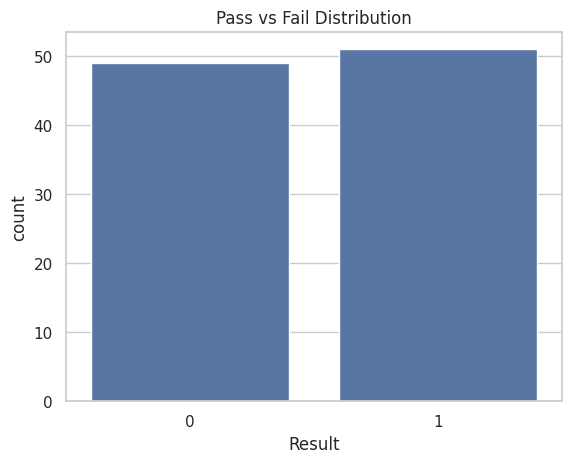

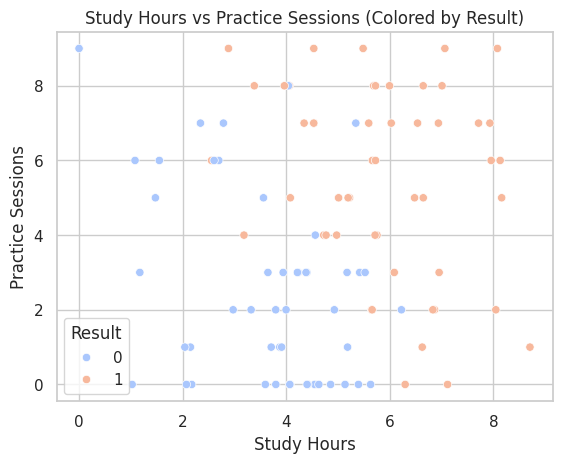

In [3]:
# Plot distribution of classes
sns.countplot(x='Result', data=df)
plt.title("Pass vs Fail Distribution")
plt.show()

# Plot feature relationships
sns.scatterplot(x='Study Hours', y='Practice Sessions', hue='Result', data=df, palette='coolwarm')
plt.title("Study Hours vs Practice Sessions (Colored by Result)")
plt.show()


#🔀 Step 4: Train-Test Split

In [4]:
# Split data into features and target
X = df[['Study Hours', 'Practice Sessions']]
y = df['Result']

# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#🔧 Step 5: Train Logistic Regression Model

In [5]:
# Initialize and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

#📈 Step 6: Predictions and Evaluation

🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



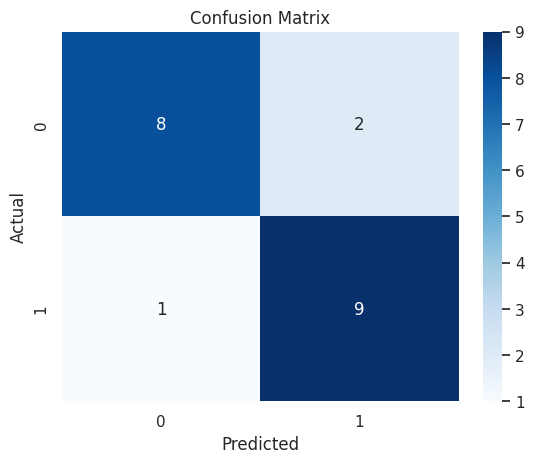

In [6]:
# Predict on test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # probability of class 1 (Pass)

# Evaluation metrics
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#📉 Step 7: ROC Curve and AUC

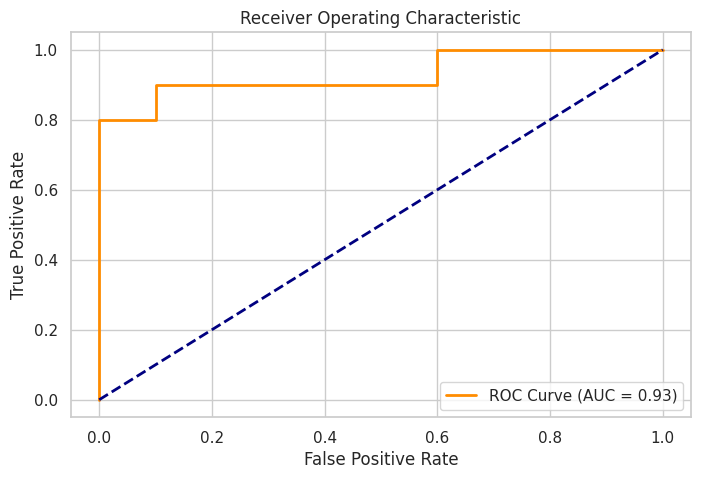

In [7]:
# Calculate FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#✅ Summary
You trained a logistic regression classifier on a synthetic dataset.

Key concepts:

Decision boundary

Probabilistic output using sigmoid

Confusion matrix, classification report

ROC-AUC for performance analysis